**Temperature anlysis**
1. 3M 1510 tape를 사용한 V3 칩의 Temperature analysis


In [ ]:
#library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as wdg  # ipywidget import
import seaborn as sns
from IPython.display import clear_output

In [ ]:
#matplotlib setting
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['axes.grid'] = True

In [ ]:
# read temperature record file 
Temp_1510 = pd.read_csv('./Data(Temp-1510-201114).csv')
pcr_1510 = pd.read_csv('./Data analysis(1510-201115).csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# drop unnucessary column
Temp_1510 = Temp_1510.drop(columns=['Chip #'])  # to erase the item titles

#drop Neg data & weird data at 1510 data
pcr_1510 = pcr_1510.drop(columns=['X4_Neg','X1_10^5.1','X4_10^5'])

In [ ]:
pcr_1510_df = pd.DataFrame()
p_register = pd.DataFrame()
p_register = pcr_1510.loc[42,:]
#p_register = p_register.T
pcr_1510_df = pcr_1510.loc[:39,:]
pcr_1510_df = pcr_1510_df.astype(int) # Dataframe 형변환
p_register = p_register.astype(float) #Dataframe 형변환

print(pcr_1510_df)

    X1_10^5  X2_10^5  X3_10^5  ...  X4_10^3.1  X1_10^3.3  X2_10^3.3
0       906      848      633  ...        843        812        780
1       903      847      646  ...        845        814        778
2       904      844      642  ...        839        813        778
3       896      843      651  ...        835        813        778
4       901      837      642  ...        836        812        777
5       895      838      650  ...        831        809        779
6       899      832      651  ...        833        805        778
7       900      833      642  ...        833        807        779
8       896      831      641  ...        834        808        778
9       898      830      641  ...        833        809        780
10      897      826      645  ...        827        803        778
11      898      825      637  ...        825        806        778
12      896      825      635  ...        824        805        779
13      897      824      641  ...        825   

Text(0, 0.5, 'Fluorescence Brightness')

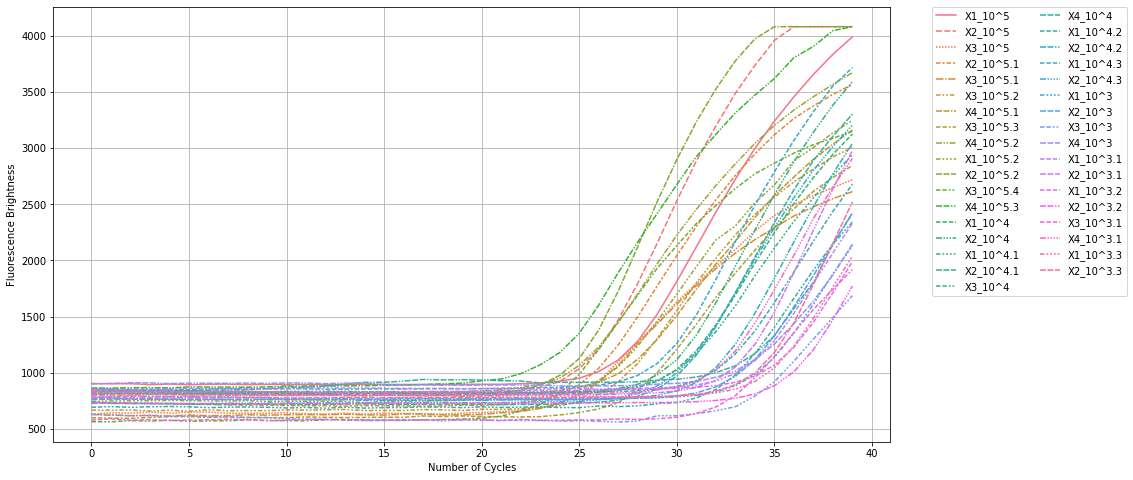

In [ ]:
sns.lineplot(data=pcr_1510_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.xlabel('Number of Cycles')
plt.ylabel('Fluorescence Brightness')

Text(0, 0.5, 'Fluorescence Brightness')

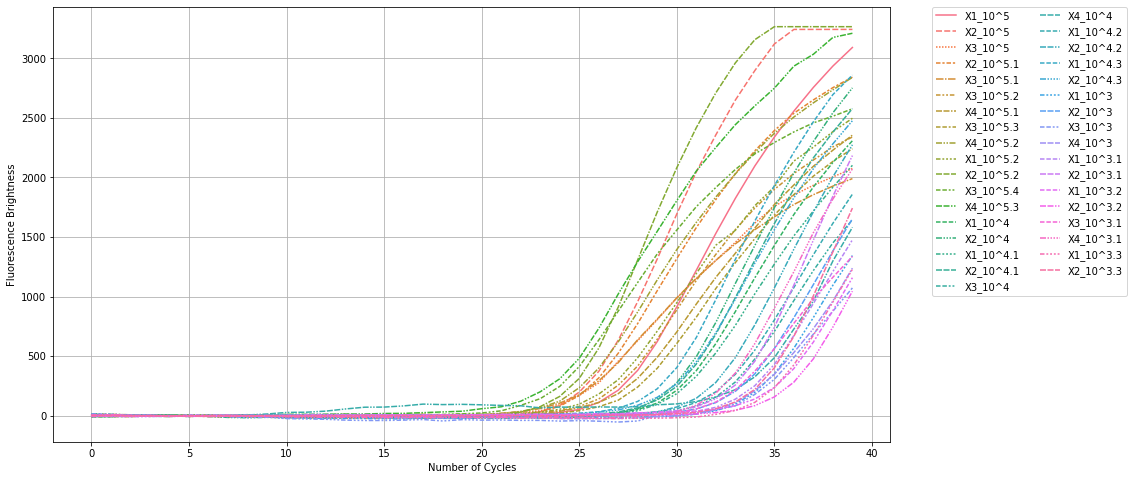

In [ ]:
# baseline fitting
pcr_1510_dbf = pcr_1510_df - np.mean(pcr_1510_df[:10])
sns.lineplot(data=pcr_1510_dbf)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.xlabel('Number of Cycles')
plt.ylabel('Fluorescence Brightness')

**Log Transformation**
1. Raw data → 10 cycle 평균을 빼서 basline fitting → Log transformation → Ct Calculation 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


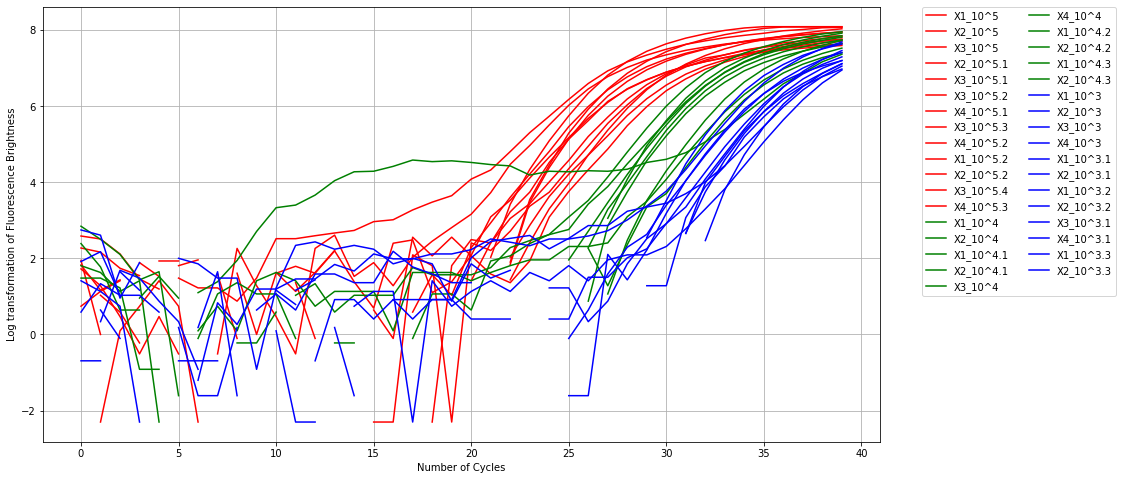

In [ ]:
pcr_1510_ldbf = np.log(pcr_1510_dbf)
#3M 1510
#plot all pcr data
sns.lineplot(data=pcr_1510_ldbf[[ col for col in pcr_1510_dbf.columns.to_list() if col[6] == '5']], palette=('red',), dashes=False)
sns.lineplot(data=pcr_1510_ldbf[[ col for col in pcr_1510_dbf.columns.to_list() if col[6] == '4']], palette=('green',), dashes=False)
sns.lineplot(data=pcr_1510_ldbf[[ col for col in pcr_1510_dbf.columns.to_list() if col[6] == '3']], palette=('blue',), dashes=False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2)
plt.xlabel('Number of Cycles')
plt.ylabel('Log transformation of Fluorescence Brightness')
plt.show()

**Calculate Ct**

In [ ]:
#Function to calculate Ct
def calcCt(lDb, lth):
    ct = np.zeros(len(lDb.columns))
    ic = 0
    
    lDb_over10 = lDb[10:]#baseline은 제외
    
    for c in lDb.columns:
        tmp=lDb_over10.loc[lDb_over10[c]>lth]
        
        if tmp.empty:
            ct[ic]=-1
        else:
            id = tmp[c].index[0]
            rv = lDb[c].loc[id]
            lv = lDb[c].loc[id-1]
            dv = rv-lv
            ct[ic] = id - (rv-lth)/dv
        ic += 1
        
    return ct

**Analysis Ct**
1. Threshold 5.5로 해서 Ct caculation


In [ ]:
th = 5.5
ct = calcCt(pcr_1510_ldbf, th)

comp_ct_pr = pd.DataFrame()
df_ct = pd.DataFrame()
Ct_value = pd.Series(ct)

#Ct data 
comp_ct_pr = p_register
Ct_value.index = comp_ct_pr.index
comp_ct_pr = pd.concat([comp_ct_pr,Ct_value.rename("Ct Value")],axis = 1)
comp_ct_pr.columns=['Pattern Register(Ω)','Ct Value']

print(comp_ct_pr)   

           Pattern Register(Ω)   Ct Value
X1_10^5                    2.6  27.223603
X2_10^5                    2.8  25.331019
X3_10^5                    3.3  25.750683
X2_10^5.1                  3.3  25.582431
X3_10^5.1                  2.9  25.642531
X3_10^5.2                  3.7  26.917558
X4_10^5.1                  2.7  27.520655
X3_10^5.3                  2.7  28.022943
X4_10^5.2                  2.6  25.070109
X1_10^5.2                  3.4  26.579863
X2_10^5.2                  2.8  24.622246
X3_10^5.4                  3.6  23.985635
X4_10^5.3                  3.8  23.450118
X1_10^4                    3.2  30.235956
X2_10^4                    2.7  29.811143
X1_10^4.1                  2.7  30.477754
X2_10^4.1                  3.2  29.984171
X3_10^4                    2.9  32.751520
X4_10^4                    4.0  33.276706
X1_10^4.2                  3.3  32.357576
X2_10^4.2                  2.9  31.791474
X1_10^4.3                  2.6  29.130352
X2_10^4.3                  3.1  29

In [ ]:
# Analysis Ct vs. Pattern register

comp_ct_pr = comp_ct_pr.T
comp_ct_pr_5 = pd.DataFrame() # 10^5 copy
comp_ct_pr_4 = pd.DataFrame() # 10^4 copy
comp_ct_pr_3 = pd.DataFrame() # 10^3 copy
#Seperate each concentration(5, 4, 3) - 3M 1510
for col in comp_ct_pr.columns:
    if col[6] == '5':
        comp_ct_pr_5 = comp_ct_pr_5.append(comp_ct_pr[col])
    elif col[6] == '4':
        comp_ct_pr_4 = comp_ct_pr_4.append(comp_ct_pr[col])
    elif col[6] == '3':
        comp_ct_pr_3 = comp_ct_pr_3.append(comp_ct_pr[col])

print(comp_ct_pr_5)

            Ct Value  Pattern Register(Ω)
X1_10^5    27.223603                  2.6
X2_10^5    25.331019                  2.8
X3_10^5    25.750683                  3.3
X2_10^5.1  25.582431                  3.3
X3_10^5.1  25.642531                  2.9
X3_10^5.2  26.917558                  3.7
X4_10^5.1  27.520655                  2.7
X3_10^5.3  28.022943                  2.7
X4_10^5.2  25.070109                  2.6
X1_10^5.2  26.579863                  3.4
X2_10^5.2  24.622246                  2.8
X3_10^5.4  23.985635                  3.6
X4_10^5.3  23.450118                  3.8


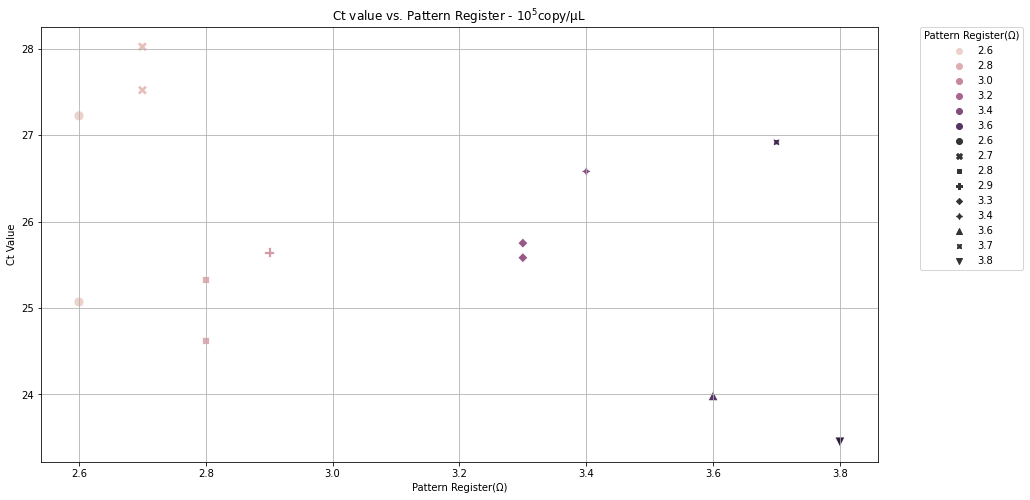

<Figure size 1080x576 with 0 Axes>

In [ ]:
# 10^5 copy 
#print(comp_ct_pr_5)
sns.scatterplot(x='Pattern Register(Ω)',
                y='Ct Value',
                hue = 'Pattern Register(Ω)',
                style = 'Pattern Register(Ω)', #different shapes by pattern register
                s = 100, #marker size
                data = comp_ct_pr_5)
plt.legend(bbox_to_anchor=(1.05, 1), loc= 2, borderaxespad=0., ncol=1, title ='Pattern Register(Ω)')
plt.title('Ct value vs. Pattern Register - ${10^5}$copy/μL')
plt.show()
plt.savefig('10^5_vs_pr.png', dpi=600)



            Ct Value  Pattern Register(Ω)
X1_10^4    30.235956                  3.2
X2_10^4    29.811143                  2.7
X1_10^4.1  30.477754                  2.7
X2_10^4.1  29.984171                  3.2
X3_10^4    32.751520                  2.9
X4_10^4    33.276706                  4.0
X1_10^4.2  32.357576                  3.3
X2_10^4.2  31.791474                  2.9
X1_10^4.3  29.130352                  2.6
X2_10^4.3  29.829718                  3.1


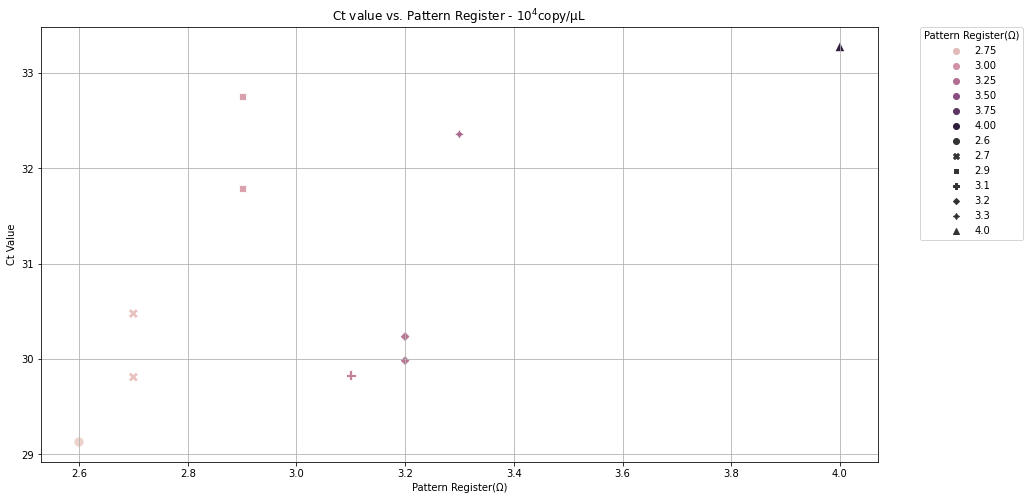

<Figure size 1080x576 with 0 Axes>

In [ ]:
# 10^4 copy 
print(comp_ct_pr_4)
sns.scatterplot(x='Pattern Register(Ω)',
                y='Ct Value',
                hue = 'Pattern Register(Ω)',
                style = 'Pattern Register(Ω)', #different shapes by pattern register
                s = 100, #marker size
                data = comp_ct_pr_4)
plt.title('Ct value vs. Pattern Register - ${10^4}$copy/μL')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1, title ='Pattern Register(Ω)')
plt.show()
plt.savefig('10^4_vs_pr.png', dpi=600)


            Ct Value  Pattern Register(Ω)
X1_10^3    34.372413                  3.3
X2_10^3    33.328162                  2.5
X3_10^3    34.581828                  3.0
X4_10^3    34.294406                  3.1
X1_10^3.1  33.947757                  3.0
X2_10^3.1  32.909220                  2.5
X1_10^3.2  35.058209                  3.5
X2_10^3.2  35.754312                  3.1
X3_10^3.1  33.231038                  3.4
X4_10^3.1  32.398919                  2.6
X1_10^3.3  35.069055                  2.7
X2_10^3.3  34.166720                  2.6


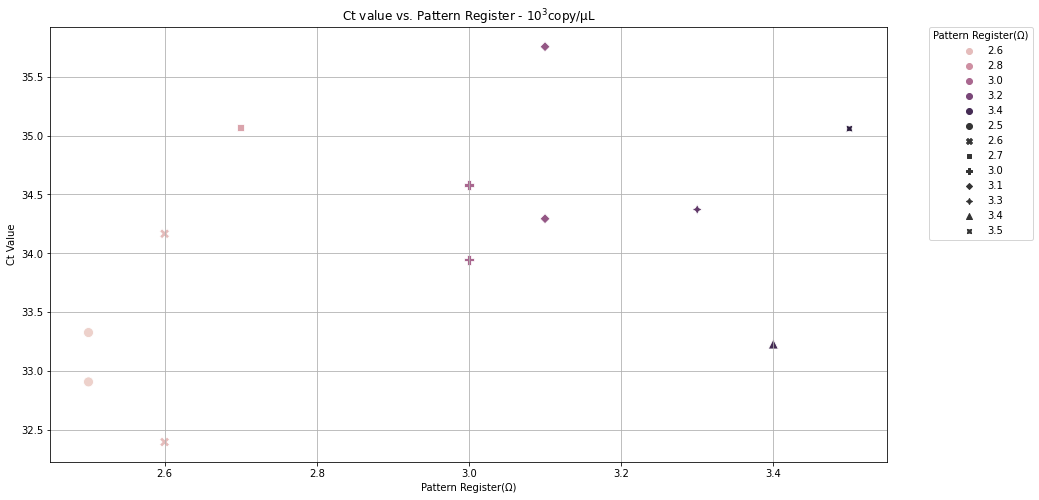

<Figure size 1080x576 with 0 Axes>

In [ ]:
# 10^3 copy 
print(comp_ct_pr_3)
sns.scatterplot(x='Pattern Register(Ω)',
                y='Ct Value',
                hue = 'Pattern Register(Ω)',
                style = 'Pattern Register(Ω)', #different shapes by pattern register
                s = 100, #marker size
                data = comp_ct_pr_3)
plt.title('Ct value vs. Pattern Register - ${10^3}$copy/μL')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1, title ='Pattern Register(Ω)')
plt.show()
plt.savefig('10^3_vs_pr.png', dpi=600)


**Analysis by concentration**

In [ ]:
#3M 1510
pcr_1510_5_df = pd.DataFrame() # 10^5 copy
pcr_1510_4_df = pd.DataFrame() # 10^4 copy
pcr_1510_3_df = pd.DataFrame() # 10^3 copy
#Seperate each concentration(5, 4, 3) - 3M 1510
for col in pcr_1510_dbf.columns:
    if col[6] == '5':
        pcr_1510_5_df = pcr_1510_5_df.append(pcr_1510_dbf[col])
    elif col[6] == '4':
        pcr_1510_4_df = pcr_1510_4_df.append(pcr_1510_dbf[col])
    elif col[6] == '3':
        pcr_1510_3_df = pcr_1510_3_df.append(pcr_1510_dbf[col])

print(f'10^5:{pcr_1510_5_df.shape[0], pcr_1510_5_df.shape[1]}, 10^4:{pcr_1510_4_df.shape[0], pcr_1510_4_df.shape[1]}, 10^3:{pcr_1510_3_df.shape[0], pcr_1510_3_df.shape[1]}')
print(pcr_1510_5_df)
display(pcr_1510_5_df)

10^5:(13, 40), 10^4:(10, 40), 10^3:(12, 40)
             0     1    2    3    4   ...      35      36      37      38      39
X1_10^5     6.2   3.2  4.2 -3.8  1.2  ...  2338.2  2556.2  2755.2  2934.2  3090.2
X2_10^5     9.7   8.7  5.7  4.7 -1.3  ...  3119.7  3241.7  3241.7  3241.7  3241.7
X3_10^5   -10.9   2.1 -1.9  7.1 -1.9  ...  1757.1  1853.1  1934.1  2004.1  2074.1
X2_10^5.1  13.3  12.3  8.3  4.3  3.3  ...  2393.3  2538.3  2650.3  2753.3  2841.3
X3_10^5.1   7.0   1.0 -3.0 -1.0 -6.0  ...  1669.0  1773.0  1855.0  1927.0  1990.0
X3_10^5.2   2.1   3.1  4.1 -4.9  2.1  ...  1899.1  2033.1  2146.1  2256.1  2339.1
X4_10^5.1  -0.4  -1.4 -3.4  6.6  4.6  ...  1772.6  1936.6  2093.6  2228.6  2354.6
X3_10^5.3  -3.1  -6.1 -8.1 -0.1  6.9  ...  1683.9  1855.9  2010.9  2133.9  2240.9
X4_10^5.2  -1.2   2.8  1.8  0.8 -3.2  ...  2369.8  2506.8  2625.8  2734.8  2839.8
X1_10^5.2  -4.9   0.1  1.1  2.1  4.1  ...  1921.1  2137.1  2254.1  2384.1  2496.1
X2_10^5.2   5.6   3.6  1.6  0.6  1.6  ...  3264.6  326

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
X1_10^5,6.2,3.2,4.2,-3.8,1.2,-4.8,-0.8,0.2,-3.8,-1.8,-2.8,-1.8,-3.8,-2.8,-0.8,-1.8,-2.8,-2.8,-3.8,-1.8,-0.8,-0.8,4.2,11.2,27.2,53.2,112.2,215.2,382.2,623.2,914.2,1221.2,1530.2,1824.2,2096.2,2338.2,2556.2,2755.2,2934.2,3090.2
X2_10^5,9.7,8.7,5.7,4.7,-1.3,-0.3,-6.3,-5.3,-7.3,-8.3,-12.3,-13.3,-13.3,-14.3,-16.3,-17.3,-14.3,-18.3,-16.3,-15.3,-14.3,-7.3,6.7,34.7,85.7,198.7,372.7,634.7,959.7,1316.7,1693.7,2046.7,2356.7,2648.7,2896.7,3119.7,3241.7,3241.7,3241.7,3241.7
X3_10^5,-10.9,2.1,-1.9,7.1,-1.9,6.1,7.1,-1.9,-2.9,-2.9,1.1,-6.9,-8.9,-2.9,-9.9,-1.9,-4.9,-7.9,-8.9,-1.9,4.1,11.1,25.1,42.1,92.1,170.1,276.1,458.1,631.1,806.1,988.1,1150.1,1304.1,1455.1,1617.1,1757.1,1853.1,1934.1,2004.1,2074.1
X2_10^5.1,13.3,12.3,8.3,4.3,3.3,-3.7,-4.7,-10.7,-10.7,-11.7,-15.7,-16.7,-17.7,-19.7,-16.7,-16.7,-18.7,-19.7,-17.7,-11.7,-14.7,-6.7,6.3,32.3,80.3,170.3,317.3,525.3,775.3,1050.3,1319.3,1579.3,1814.3,2032.3,2223.3,2393.3,2538.3,2650.3,2753.3,2841.3
X3_10^5.1,7.0,1.0,-3.0,-1.0,-6.0,2.0,-3.0,-3.0,5.0,1.0,5.0,6.0,5.0,9.0,4.0,2.0,11.0,12.0,3.0,4.0,8.0,22.0,34.0,61.0,106.0,177.0,293.0,446.0,639.0,812.0,990.0,1154.0,1304.0,1443.0,1562.0,1669.0,1773.0,1855.0,1927.0,1990.0
X3_10^5.2,2.1,3.1,4.1,-4.9,2.1,-6.9,6.1,-2.9,-0.9,-1.9,5.1,3.1,5.1,9.1,-0.9,0.1,0.1,8.1,6.1,0.1,11.1,9.1,15.1,29.1,42.1,78.1,141.1,257.1,418.1,643.1,889.1,1135.1,1354.1,1562.1,1743.1,1899.1,2033.1,2146.1,2256.1,2339.1
X4_10^5.1,-0.4,-1.4,-3.4,6.6,4.6,-3.4,3.6,-2.4,0.6,-4.4,-3.4,-2.4,1.6,-9.4,-10.4,-5.4,-6.4,-11.4,-8.4,-14.4,-10.4,-7.4,7.6,17.6,37.6,67.6,111.6,185.6,315.6,491.6,703.6,937.6,1161.6,1363.6,1575.6,1772.6,1936.6,2093.6,2228.6,2354.6
X3_10^5.3,-3.1,-6.1,-8.1,-0.1,6.9,6.9,-0.1,4.9,0.9,-2.1,-2.1,3.9,0.9,-1.1,-0.1,1.9,0.9,12.9,7.9,12.9,7.9,4.9,3.9,6.9,21.9,42.9,75.9,130.9,241.9,398.9,606.9,827.9,1067.9,1284.9,1486.9,1683.9,1855.9,2010.9,2133.9,2240.9
X4_10^5.2,-1.2,2.8,1.8,0.8,-3.2,-0.2,1.8,-1.2,-0.2,-1.2,0.8,-5.2,-6.2,-2.2,-1.2,-0.2,-4.2,1.8,4.8,2.8,9.8,18.8,36.8,67.8,122.8,235.8,399.8,620.8,872.8,1140.8,1394.8,1622.8,1835.8,2028.8,2209.8,2369.8,2506.8,2625.8,2734.8,2839.8
X1_10^5.2,-4.9,0.1,1.1,2.1,4.1,2.1,0.1,-1.9,2.1,-4.9,-3.9,-2.9,-1.9,-5.9,-14.9,-5.9,-1.9,-0.9,0.1,6.1,12.1,11.1,21.1,31.1,55.1,97.1,182.1,303.1,488.1,711.1,949.1,1194.1,1431.1,1556.1,1763.1,1921.1,2137.1,2254.1,2384.1,2496.1


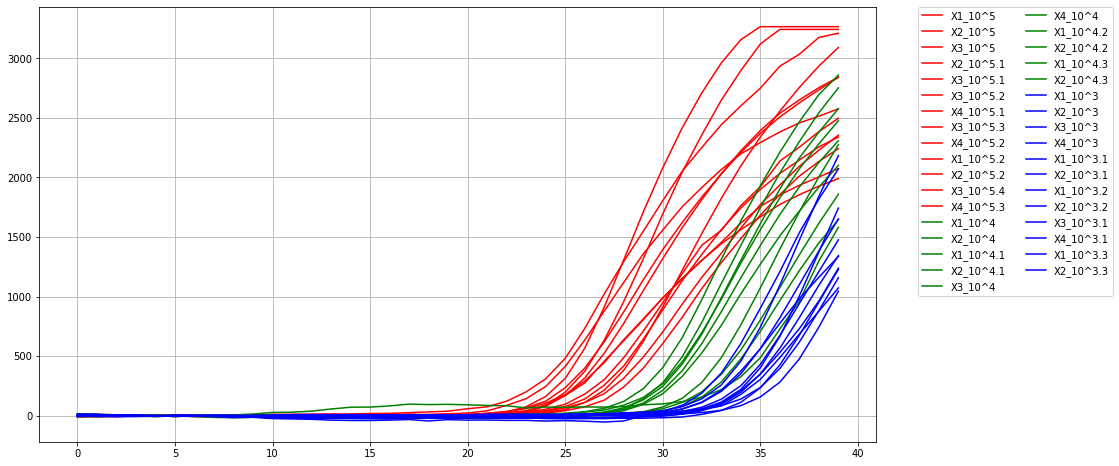

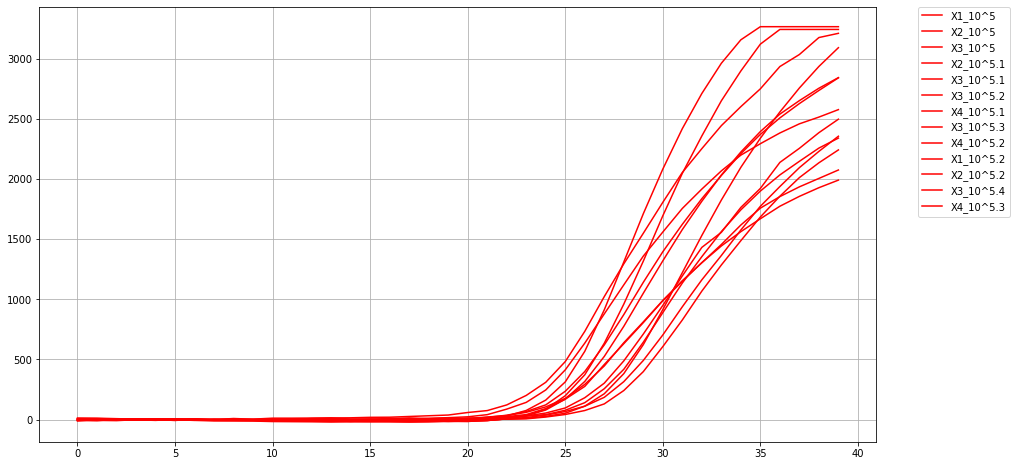

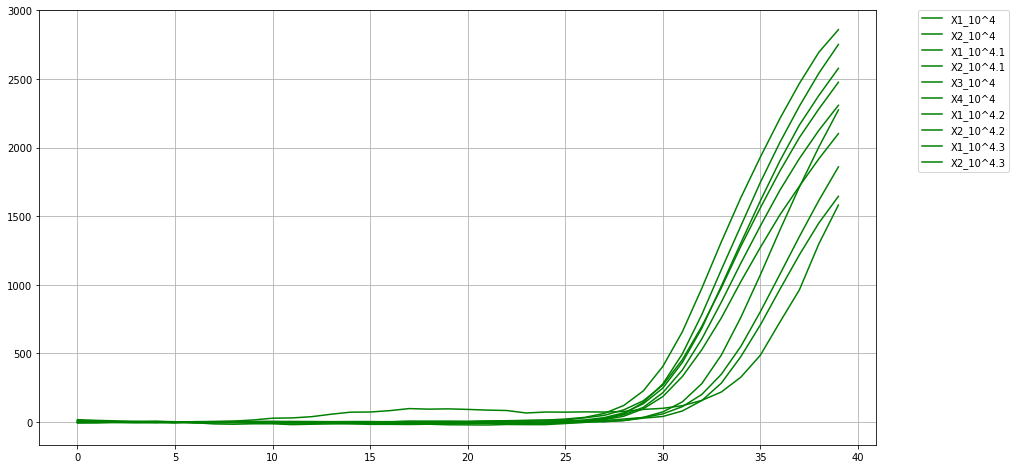

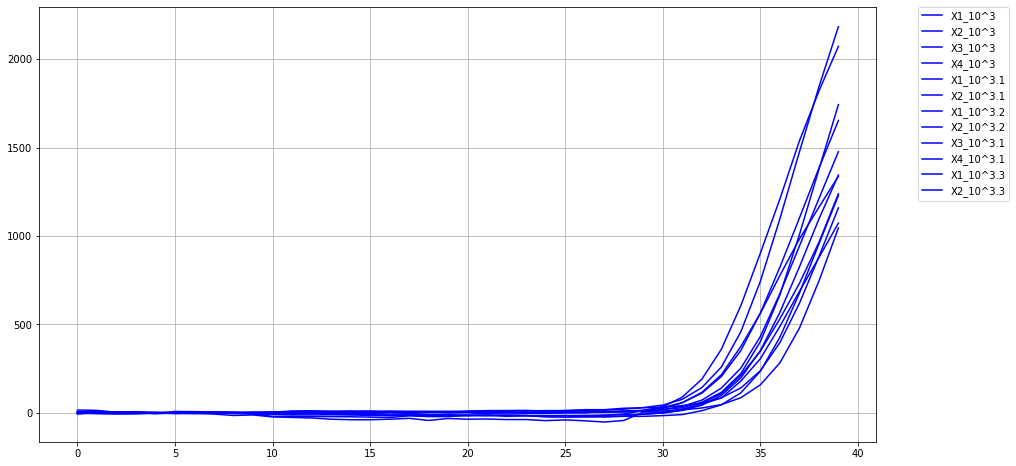

In [ ]:
#3M 1510
#plot all pcr data
sns.lineplot(data=pcr_1510_dbf[[ col for col in pcr_1510_dbf.columns.to_list() if col[6] == '5']], palette=('red',), dashes=False)
sns.lineplot(data=pcr_1510_dbf[[ col for col in pcr_1510_dbf.columns.to_list() if col[6] == '4']], palette=('green',), dashes=False)
sns.lineplot(data=pcr_1510_dbf[[ col for col in pcr_1510_dbf.columns.to_list() if col[6] == '3']], palette=('blue',), dashes=False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2)
plt.show()

#plot 10^5 data
sns.lineplot(data=pcr_1510_dbf[[ col for col in pcr_1510_dbf.columns.to_list() if col[6] == '5']], palette=('red',), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

#plot 10^4 data
sns.lineplot(data=pcr_1510_dbf[[ col for col in pcr_1510_dbf.columns.to_list() if col[6] == '4']], palette=('green',), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

#plot 10^3 data
sns.lineplot(data=pcr_1510_dbf[[ col for col in pcr_1510_dbf.columns.to_list() if col[6] == '3']], palette=('blue',), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

In [ ]:
pcr_1510_5_ldf = np.log(pcr_1510_5_df)
pcr_1510_4_ldf = np.log(pcr_1510_4_df)
pcr_1510_3_ldf = np.log(pcr_1510_3_df)
pcr_1510_ldbf = np.log(pcr_1510_dbf)

th = 5.5
# 10^5 copy 
ct = calcCt(pcr_1510_ldbf, th)


print(ct)

[27.22360288 25.33101947 25.75068343 25.5824305  25.64253089 26.91755763
 27.52065487 28.02294261 25.07010868 26.57986275 24.62224603 23.98563515
 23.45011803 30.23595577 29.81114333 30.47775371 29.98417127 32.75152004
 33.27670608 32.35757641 31.79147433 29.13035158 29.82971751 34.3724128
 33.32816151 34.58182826 34.29440569 33.94775674 32.90921983 35.05820856
 35.7543121  33.23103825 32.39891867 35.06905488 34.16672023]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


**Temperature Analysis**
1. 3M 1510 chip temperaeture analysis


In [ ]:
Temp_1510_df = pd.DataFrame()
temp_data = pd.DataFrame()
Temp_1510_df = Temp_1510.loc[5:,:]
Temp_1510_df = Temp_1510_df.reset_index(drop = True)
#print(Temp_1510_df.isnull().sum())
temp = np.array(Temp_1510_df).T
print(temp)
np.vsplit(temp,38)

#for col in range(len(Temp_1510_df.columns)):
#    col = Temp_1510_df.iloc[:,col].dropna()

display(Temp_1510_df)

Temp_1510_dna = Temp_1510_df.dropna()

display(Temp_1510_dna)


#for i in range(len(Temp_1510_df.columns)):
#    Temp_1510_df[col] = Temp_1510_df[col].dropna()
#print(Temp_1510_df)   

[['25.8' '25.8' '25.8' ... 72.9 72.7 72.5]
 ['26.6' '26.6' '26.6' ... 57.9 58.0 58.6]
 ['26' '26' '26' ... 94.6 95.0 95.0]
 ...
 ['26.8' '26.8' '26.8' ... 59.9 59.9 nan]
 ['26.1' '26.1' '25.3' ... 71.9 71.8 nan]
 ['45.5' '45.5' '45.4' ... 59.5 59.4 nan]]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,25.8,26.6,26,25.3,27,27.6,27.4,27.6,25.5,26.2,25.5,27.4,26.4,25.8,25.3,25.3,26.4,27.2,26.2,26.4,26.2,25.7,26.8,25.3,26.4,26.2,24.8,24.6,26.5,25.5,25.8,26.1,26.8,26.6,26,26.8,26.1,45.5
1,25.8,26.6,26,25.1,27,27.4,27.4,27.4,25.5,26.4,25.5,27.4,26.4,26,25.3,25.3,26.4,27.2,26.2,26.4,26.2,25.7,26.8,25.3,26.4,26.2,24.8,24.6,26.5,25.5,25.8,26.1,26.8,26.6,26,26.8,26.1,45.5
2,25.8,26.6,26,25.3,26,27.4,27.6,27.6,25.5,26.2,25.5,27.4,26.4,25.8,25.3,25.5,26.4,27.2,26.2,26.4,26.2,25.7,26.8,25.5,26.4,26.2,24.8,24.6,26.5,25.5,25.8,25.1,26,25.8,26,26.8,25.3,45.4
3,25.8,25.8,26,25.3,26.2,27.6,27.6,27.4,25.5,26.4,25.5,27.6,26.4,25.8,25.3,25.5,26.4,27.2,26.4,26.4,26.4,25.7,26.8,24.6,26.4,26.2,24.8,24.6,25.7,25.7,25.8,25.3,26.2,25.8,26,26,25.3,45.4
4,25.8,26,26,25.3,26.4,27.6,27.9,27.6,25.5,26.4,25.7,27.7,26.4,25.8,25.5,25.5,26.4,27.2,26.4,26.4,26.4,25.7,27,24.8,26.6,26.4,25,24.8,25.7,25.7,26,25.5,26.4,26,26.2,26,25.5,45.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25902,73.1,57.5,95,94.8,56.3,94.6,72.9,59.9,68,59.9,95,59.9,95,53.7,63.7,95.1,90.5,59.4,91.2,59.9,68.6,59.8,94.2,61,94.8,59.3,62.5,93.5,94.6,57.5,94.8,70.3,65.4,57.8,90,59.9,72.2,59.7
25903,73,57.6,95,94.6,56,94.6,72.7,59.9,68,59.9,95.1,59.9,95.1,53.6,63.7,95.1,90.6,59.5,91.5,59.9,68.5,59.8,94.3,60.9,94.8,59.4,62.4,93.7,94.6,57.5,94.5,70.1,65.4,57.8,90.1,59.9,72.1,59.7
25904,72.9,57.9,94.6,94.6,56.6,94.6,72.6,59.9,67.7,59.9,95.1,59.9,95.1,53.6,63.6,95.1,90.6,59.5,91.7,59.8,68.5,59.8,94.5,60.9,94.8,59.4,62.2,93.7,94.6,57.5,95,70,65.3,57.6,90.3,59.9,71.9,59.5
25905,72.7,58,95,94.6,56.8,94.6,72.5,59.9,67.6,59.9,95.1,59.9,95.1,53.6,63.6,95.1,90.8,59.5,91.9,59.8,68.2,59.7,94.5,60.7,94.8,59.5,62.1,93.8,94.6,57.5,95,69.9,65.3,57.6,90.3,59.9,71.8,59.4


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,25.8,26.6,26,25.3,27,27.6,27.4,27.6,25.5,26.2,25.5,27.4,26.4,25.8,25.3,25.3,26.4,27.2,26.2,26.4,26.2,25.7,26.8,25.3,26.4,26.2,24.8,24.6,26.5,25.5,25.8,26.1,26.8,26.6,26,26.8,26.1,45.5
1,25.8,26.6,26,25.1,27,27.4,27.4,27.4,25.5,26.4,25.5,27.4,26.4,26,25.3,25.3,26.4,27.2,26.2,26.4,26.2,25.7,26.8,25.3,26.4,26.2,24.8,24.6,26.5,25.5,25.8,26.1,26.8,26.6,26,26.8,26.1,45.5
2,25.8,26.6,26,25.3,26,27.4,27.6,27.6,25.5,26.2,25.5,27.4,26.4,25.8,25.3,25.5,26.4,27.2,26.2,26.4,26.2,25.7,26.8,25.5,26.4,26.2,24.8,24.6,26.5,25.5,25.8,25.1,26,25.8,26,26.8,25.3,45.4
3,25.8,25.8,26,25.3,26.2,27.6,27.6,27.4,25.5,26.4,25.5,27.6,26.4,25.8,25.3,25.5,26.4,27.2,26.4,26.4,26.4,25.7,26.8,24.6,26.4,26.2,24.8,24.6,25.7,25.7,25.8,25.3,26.2,25.8,26,26,25.3,45.4
4,25.8,26,26,25.3,26.4,27.6,27.9,27.6,25.5,26.4,25.7,27.7,26.4,25.8,25.5,25.5,26.4,27.2,26.4,26.4,26.4,25.7,27,24.8,26.6,26.4,25,24.8,25.7,25.7,26,25.5,26.4,26,26.2,26,25.5,45.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25901,73.4,57.5,95,94.8,56.2,94.6,73,59.9,68.1,59.9,95.1,59.9,95.1,53.8,63.8,95.1,90.3,59.4,91.1,59.9,68.8,59.9,94,61.1,95,59.3,62.6,93.7,94.8,57.5,94.8,70.4,65.6,57.8,89.8,59.9,72.3,59.8
25902,73.1,57.5,95,94.8,56.3,94.6,72.9,59.9,68,59.9,95,59.9,95,53.7,63.7,95.1,90.5,59.4,91.2,59.9,68.6,59.8,94.2,61,94.8,59.3,62.5,93.5,94.6,57.5,94.8,70.3,65.4,57.8,90,59.9,72.2,59.7
25903,73,57.6,95,94.6,56,94.6,72.7,59.9,68,59.9,95.1,59.9,95.1,53.6,63.7,95.1,90.6,59.5,91.5,59.9,68.5,59.8,94.3,60.9,94.8,59.4,62.4,93.7,94.6,57.5,94.5,70.1,65.4,57.8,90.1,59.9,72.1,59.7
25904,72.9,57.9,94.6,94.6,56.6,94.6,72.6,59.9,67.7,59.9,95.1,59.9,95.1,53.6,63.6,95.1,90.6,59.5,91.7,59.8,68.5,59.8,94.5,60.9,94.8,59.4,62.2,93.7,94.6,57.5,95,70,65.3,57.6,90.3,59.9,71.9,59.5


Chip 8 를 확인합니다.


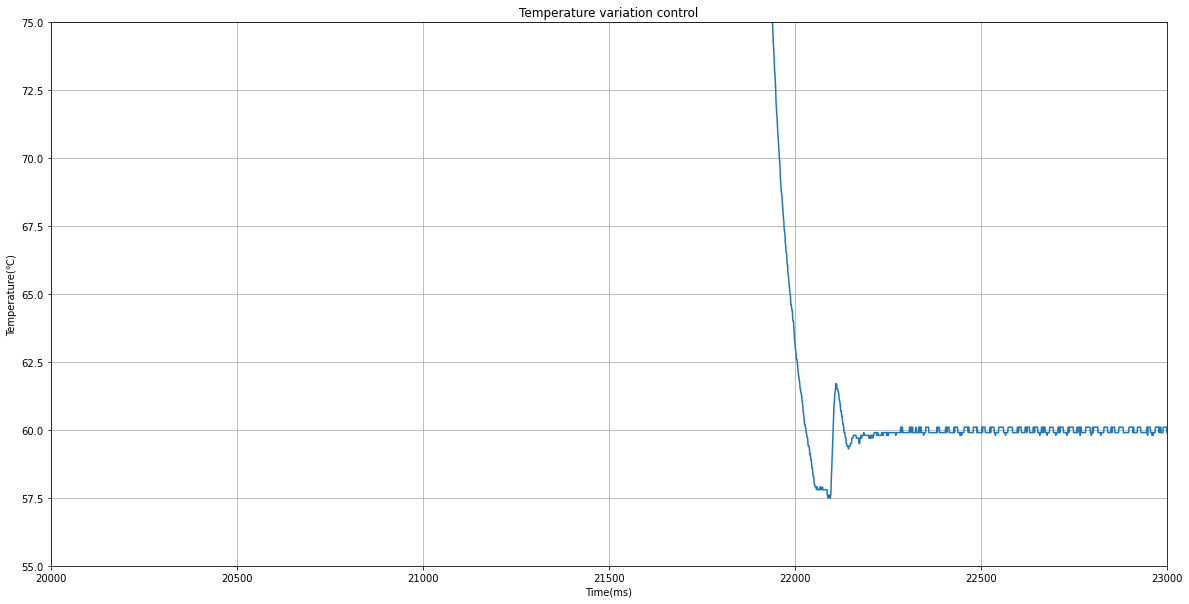

Enter를 눌러주세요!
quit


In [ ]:
#Temp_1510_df = Temp_1510_df.astype(float)

print("Temperature plot display")
for col in Temp_1510_df.columns:
    print("Enter를 눌러주세요!")
    
    n = input()
    if len(n) == 0:  # enter key를 눌렀을 때 
        clear_output(wait=True)   #기존 쌓인 데이터 clear
        print("Chip %s 를 확인합니다." %col)
        temp = Temp_1510_df.loc[:, col]
        plt.figure(figsize=(20, 10))
        plt.plot(temp.index, temp.values.astype(np.float))
        plt.title('Temperature variation control', fontsize ='large')
        plt.xlabel('Time(ms)')
        plt.ylabel('Temperature(℃)')
        plt.xlim([20000,23000]) #x axis range
        plt.ylim([55,75]) #y axis range
        plt.show() 
        
    if n == "quit":
        break

      1     2     3     4     5     6  ...    33    34    35    36    37    38
1  4557  4472  4717  4806  4395  4903  ...  4531  4519  4917  5492  4557  4402
2   2.6   2.8   3.3   3.4   2.7   3.3  ...   2.6   3.1   3.6   3.8   2.7   2.6

[2 rows x 38 columns]


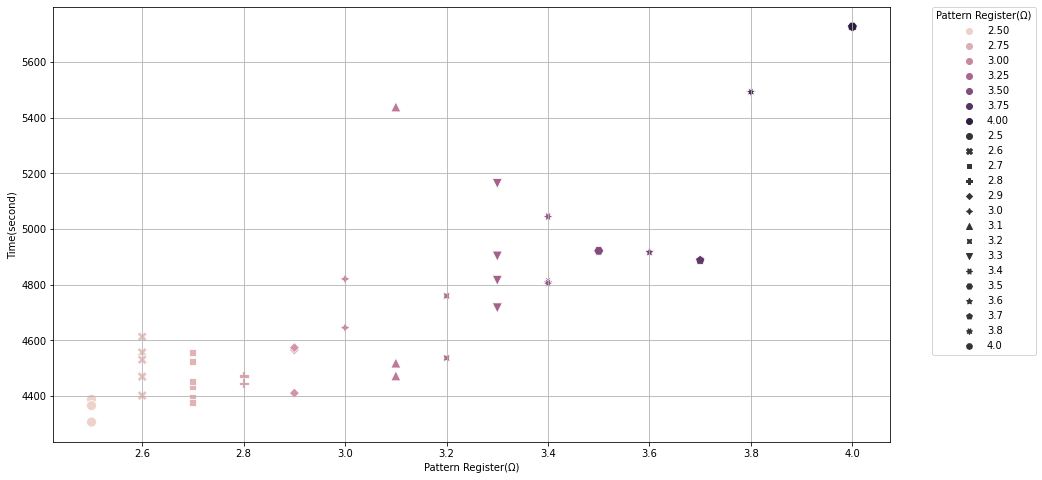

<Figure size 1080x576 with 0 Axes>

In [ ]:
# relation analysis between pattern register and elapsed time
E_time_1510 = pd.DataFrame()
T_1510 = pd.DataFrame()

E_time_1510 = Temp_1510.loc[1:2,:]
print(E_time_1510)
E_time_1510 = E_time_1510.astype(float)

T_1510 = E_time_1510.T  # transpose E_time_1510
T_1510.rename(columns = {1:"Time(second)",2:"Pattern Register(Ω)"}, inplace = True )

T_1510 = T_1510.sort_values(by=["Pattern Register(Ω)"])
#T_1510_gt = T_1510.sort(key="Pattern Register")
sns.scatterplot(x='Pattern Register(Ω)',
                y='Time(second)',
                hue = 'Pattern Register(Ω)',
                style = 'Pattern Register(Ω)', #different shapes by pattern register
                s = 100, #marker size
                data = T_1510)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1, title ='Pattern Register(Ω)')
plt.show()
plt.savefig('E_time_vs_pr.png', dpi=600)